<a href="https://colab.research.google.com/github/abdishifa234/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# lets calculate mean
sales= [3505, 2400, 3027, 2798, 3700, 3250, 2689]
total=sum(sales)
mean=total/len(sales)
mean

3052.714285714286

In [49]:
# lets write a function which can calculate standard deviation
def variance(sales):
        # Number of observations
        n = len(sales)
        # Mean of the data
        mean = sum(sales) / n
        # Square deviations
        deviations = [(x - mean) ** 2 for x in sales]  # list comprehension
        # Variance
        variance = sum(deviations) / n
        return variance

In [50]:
#lets check the variance of our sales data
variance(sales)

183761.06122448976

In [51]:
# lets write a function which can calculate standard deviation
import math
def stdev(sales):
        var = variance(sales)
        std_dev = math.sqrt(var)
        return std_dev

In [52]:
#lets check the results
stdev(sales)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [53]:
sales= [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers= [127, 80, 105, 92, 120, 115, 93]
# last_week_sales= np.stack((last_week_sales, number_of_customers), axis=0)
# np.cov(last_week_sales)

In [54]:
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [55]:
Covariance = np.cov(customers, sales)[0][1]
print(Covariance)

7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [34]:
#lets write another function which can calculate standard deviation
sales_total = 0
for item in sales:
  sales_total += item
mean = sales_total/len(sales)
variance = 0
for item in sales:
  variance += (item - mean)**2
variance = variance/(len(sales)-1)
stddev = variance**(1/2)

In [37]:
#now lets calculate correlation /pearson's correlation coefficient/
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]

customers_total = 0
for item in customers:
  customers_total += item
mean = customers_total/len(customers)
customer_variance = 0
for item in customers:
  customer_variance += (item - mean)**2
customer_variance = customer_variance/(len(customers)-1)
customer_stddev = customer_variance**(1/2)

correlation = Covariance/(stddev*customer_stddev)

correlation 

0.9628339778148909

In [40]:
#lets check the answer using numpy
correlation=np.corrcoef(sales, customers)[0, 1]
correlation

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [47]:
df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv',index_col=[0])
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [56]:
# calculate the covariance for the dataset
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [57]:
# calculate the correlation for the entire dataset
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [ ]:
vector_1 = [0, 2]
vector_2 = [2, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

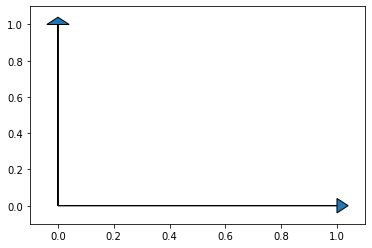

In [64]:
#lets plot two orthogonal vectors
v1 = np.array([1,0])
v2 = np.array([0,1])
origin = np.array([0,0])
import matplotlib.pyplot as plt
plt.arrow(0,0,v1[0],v1[1], head_width=0.08, head_length=0.04)
plt.arrow(0,0,v2[0],v2[1], head_width=0.08, head_length=0.04)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

######The synonym for orthogonal is ***Perpendicular****

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [78]:
#If these vectors are orthogonal their dot product will be zero
#lets creat the array vectors of a and b
a=np.array([[-5],[3],[7]])
b=np.array([[6],[-8],[2]])
print(a)
print(b)

[[-5]
 [ 3]
 [ 7]]
[[ 6]
 [-8]
 [ 2]]


In [81]:
# i dont know why vector a and vector b have the same shape and both of them are column vectors
#but i cant get their dot product

In [82]:
#lets check their dot product
np.dot(a,b)

ValueError: ignored

In [83]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b)

-40

###These vectors are not orthogonal. The dot product of two vectors will always be zero if those vectors are orthogonal.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [84]:
#Lets creat vector c by numpy array
c=np.array([2,-15,6,20])

In [90]:
#What is  ||c||2 
c = np.array(c)
print((np.linalg.norm(c)**2), 'the norm length squared')


665.0 the norm length squared


In [91]:
#What is  c⋅c 
print(np.dot(c,c), 'the dot product')


665 the dot product


In [92]:
#What is  cTc 
print(np.transpose(c)*c, 'c transpose times c')

[  4 225  36 400] c transpose times c


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [93]:
##lets calculate the norms of the vectors
d = np.array([7,12])
print(np.linalg.norm(d))
e = np.array([2,11,-8])
print(np.linalg.norm(e))

13.892443989449804
13.74772708486752


\begin{align}
 d = 13.9\begin{bmatrix} 7/13.9 \\ 12/13.9 \end{bmatrix}
 \qquad
e = 13.7\begin{bmatrix} 2/13.7 \\ 11/13.7 \\ -8/13.7 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [94]:
f = np.array([4,12,11,9,2])
print(np.linalg.norm(f))

19.131126469708992


####f_hat=19.1311/f

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

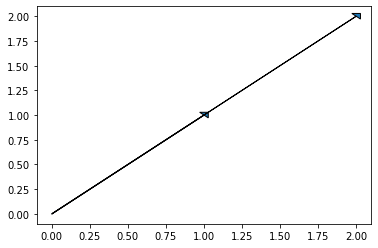

In [95]:
# linearly dependent vectors
plt.arrow(0,0,1,1, head_width=0.08, head_length=0.04)
plt.arrow(0,0,2,2, head_width=0.08, head_length=0.04)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

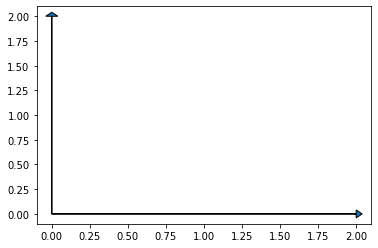

In [96]:
# linearly independent vectors
plt.arrow(0,0,0,2, head_width=0.08, head_length=0.04)
plt.arrow(0,0,2,0, head_width=0.08, head_length=0.04)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [98]:
# This is one possible linear combination:
g=np.array([1,2])
h=np.array([4,8])
a,b=(2,4)
linear_combi= np.multiply(g, a) + np.multiply(h, b) 
print(linear_combi)

[18 36]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

####To find the span of multiple vectors you first have to find their rank. Because their matrix is rank 3, we know that these vectors span R^3.(Source:class Notes, Austine)

In [99]:

l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]
m = np.array([l,m,n])
span = np.linalg.matrix_rank(m)
print(span)

3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



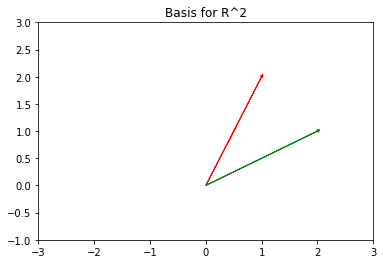

In [105]:
# find basis vectors in 2-d/Not mine/
vector_1 = [1, 2]
vector_2 = [2, 1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

In [ ]:
#If two vectors x1,x2 are linearly dependent, the either x1=λx2 or x2=λx1 for some λ, in other words they lie on the same line.

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [100]:
P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
print(np.linalg.matrix_rank(P), 'is the rank of matrix P')

3 is the rank of matrix P


## 7.2 What does the rank of a matrix tell us?

####The rank of a matrix tells us the maximum number of linearly independent column vectors in the matrix or the maximum number of linearly independent row vectors in the matrix

###Rank tells us the number of linearly independent vectors in the row space of a matrix and by extension the space of R^n that is spanned by the vectors of the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [101]:
# Original Vector
v = np.array([1,3])
w = np.array([-1,2])

In [102]:
#Find their product
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [103]:
# projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()